In [3]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.


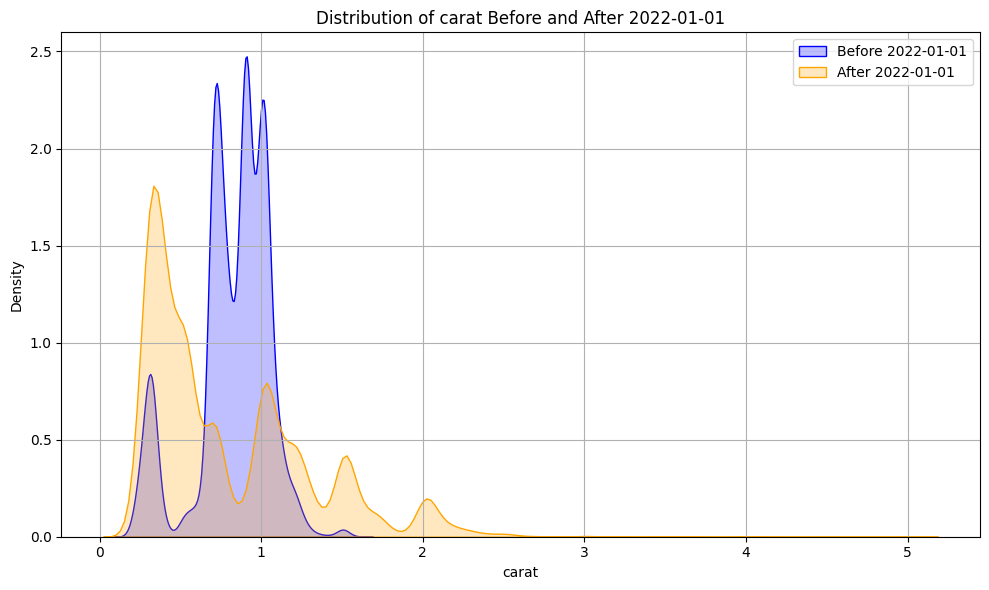


--- Kolmogorov-Smirnov Test Results ---
KS Statistic : 0.3995
p-value      : 0.0000
➡️  Significant data drift detected (p < 0.05).


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np

# Load a sample dataset
df = sns.load_dataset('diamonds')

# Simulate a fake "date" column to split the data into two periods
np.random.seed(0)
n = len(df)
df['date'] = pd.date_range(start='2021-01-01', periods=n, freq='H')

# Let's pretend 'carat' is the feature we're checking for drift
feature = 'carat'

# Define two time periods (simulate drift by splitting date)
split_date = '2022-01-01'
period1 = df[df['date'] < split_date]
period2 = df[df['date'] >= split_date]

# KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(period1[feature], label=f'Before {split_date}', fill=True, color='blue')
sns.kdeplot(period2[feature], label=f'After {split_date}', fill=True, color='orange')
plt.title(f'Distribution of {feature} Before and After {split_date}')
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Kolmogorov-Smirnov Test
ks_stat, ks_p = ks_2samp(period1[feature].dropna(), period2[feature].dropna())

print("\n--- Kolmogorov-Smirnov Test Results ---")
print(f"KS Statistic : {ks_stat:.4f}")
print(f"p-value      : {ks_p:.4f}")

if ks_p < 0.05:
    print("➡️  Significant data drift detected (p < 0.05).")
else:
    print("✅  No significant data drift detected (p ≥ 0.05).")
